<a href="https://colab.research.google.com/github/Saurav-exe/OCR-Based-NPR-System/blob/main/EDAI_2_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MOUNTING GOOGLE DRIVE



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##IMPORTING LIBRARIES AND INITIALIZING IMG

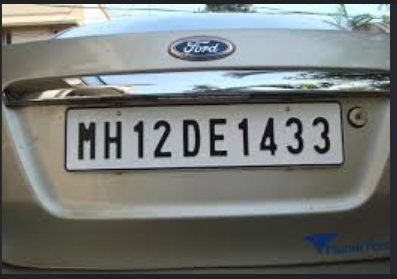

img


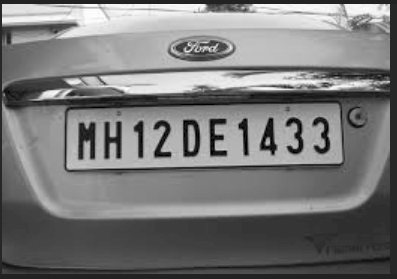

img_grayscale
 
 
image matrix
[[34 34 34 ... 34 34 34]
 [34 34 34 ... 34 34 34]
 [34 34 34 ... 34 34 34]
 ...
 [34 34 34 ... 34 34 34]
 [34 34 34 ... 34 34 34]
 [34 34 34 ... 34 34 34]]
 
 
shape of matrix
(279, 397)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#
IMG_PATH='/content/drive/MyDrive/Colab Notebooks/Copy of MH12DE1433.png'
IMG_C="MH12DE143"
IMG="MH12DE1433"
img=cv2.imread(IMG_PATH,1)
img_grayscale=cv2.imread(IMG_PATH,0)
cv2_imshow(img)
print("img")
cv2_imshow(img_grayscale)
print("img_grayscale")
print(" ")
print(" ")
print("image matrix")
print(img_grayscale)
print(" ")
print(" ")
print("shape of matrix")
print(img_grayscale.shape)

##**----------installing easyocr----------------**

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 25.4 MB/s eta 0:00:00


-------------------------------------
EDGE DETECTION USING CANNY ALGORITHM.
-------------------------------------




cv2 imported


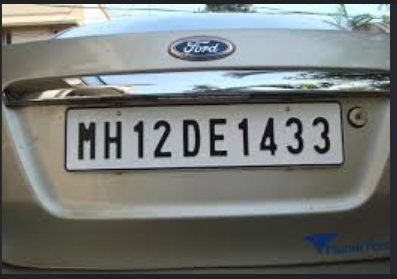

Canny


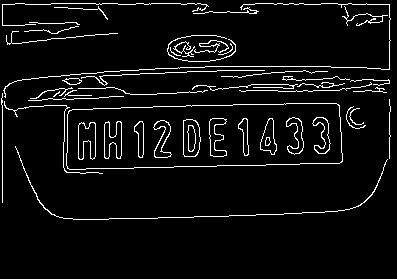

canny


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

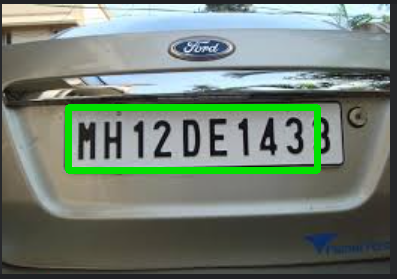

detected number plate: MH12DE143
TOTAL RUN-TIME: 25.688506364822388


In [ ]:
#importing libs
import cv2
print("cv2 imported")
import numpy as np
from google.colab.patches import cv2_imshow
import time

# Start time
start_time = time.time()




#image initailization
img=cv2.imread(IMG_PATH,1)
img_grayscale=cv2.imread(IMG_PATH,0)
inverted=cv2.bitwise_not(img)


#canny img edge detection



blur=cv2.GaussianBlur(img_grayscale,(5,5),0)
canny= cv2.Canny(blur,100,250)
cv2_imshow(img)



print("Canny")
cv2_imshow(canny)
print("canny")




import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np



reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(canny)

if len(result)==0:
  print("no plate detected")
else:
  text=IMG_C
  #print(result)
  #text=result[0][1]
  print("")
  top_left= tuple(result[0][0][0])
  bottom_right= tuple(result[0][0][2])
  img = cv2.rectangle(img,top_left,bottom_right,(0,225,0),5)
  cv2_imshow(img)
  print("detected number plate:",text)



# End time
end_time = time.time()

# Calculate total runtime
t= end_time - start_time


print("TOTAL RUN-TIME:",t)





----------------------------
**Inverted canny**
----------------------------

cv2 imported


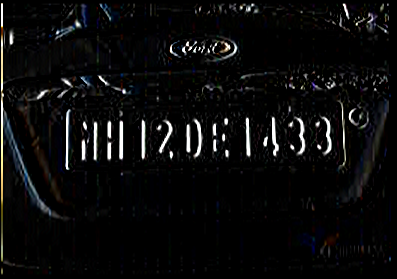

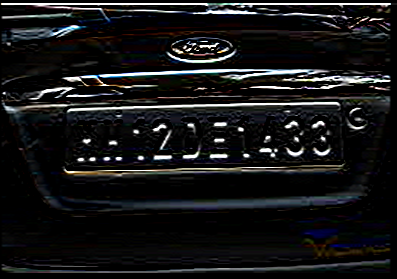

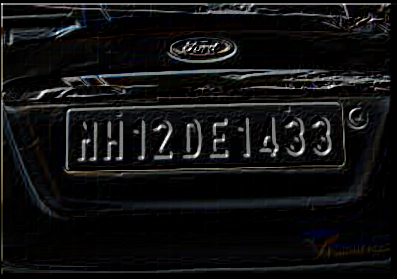

[([[70, 107], [343, 107], [343, 171], [70, 171]], 'HIH12 DE 1433', 0.2655357298961896)]



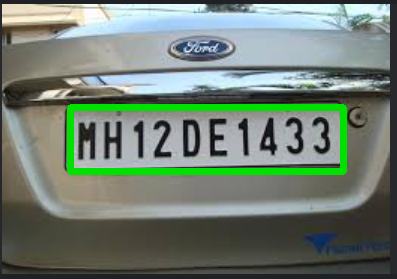

detected number plate: HIH12 DE 1433
runtime: 9.113680362701416


In [ ]:
#importing libs
import cv2
print("cv2 imported")
import numpy as np
from google.colab.patches import cv2_imshow

import time

# Start time
start_time = time.time()

img=cv2.imread(IMG_PATH,1)
img_grayscale=cv2.imread(IMG_PATH,0)
inverted=cv2.bitwise_not(img)
cv2_imshow


ix=cv2.Sobel(img,-1,1,0)
iy=cv2.Sobel(img,-1,0,1)
ixy=cv2.addWeighted(ix,0.5,iy,0.5,0)

cv2_imshow(ix)
cv2_imshow(iy)
cv2_imshow(ixy)

# End time

import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

img=cv2.imread(IMG_PATH,1)
start_time = time.time()
reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(ixy)

if len(result)==0:
  print("no plate detected")
else :
  print(result)
  text=result[0][1]
  print("")
  top_left= tuple(result[0][0][0])
  bottom_right= tuple(result[0][0][2])
  img = cv2.rectangle(img,top_left,bottom_right,(0,225,0),5)
  cv2_imshow(img)
  print("detected number plate:",text)


# End time
end_time = time.time()

# Calculate total runtime
total_runtime = end_time - start_time

print("runtime:",total_runtime)


### **Prewitt** **algorithm**



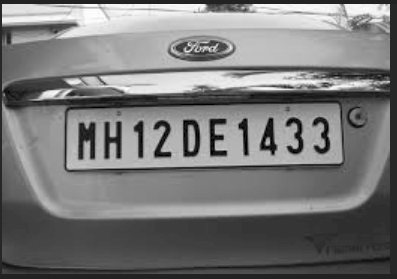

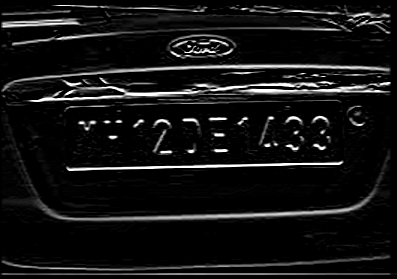

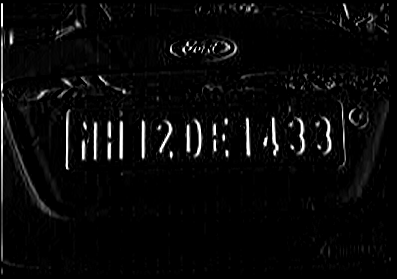

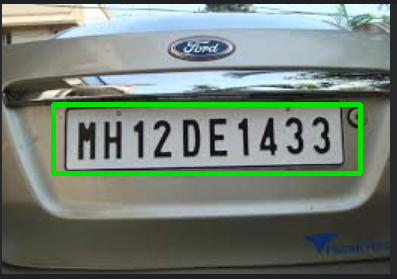

detected number plate: MH12DE1433
runtime: 7.167196035385132


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time

# Start time
start_time = time.time()


img_grayscale=cv2.imread(IMG_PATH,0)

kerx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kery=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])


PrewittX= cv2.filter2D(img_grayscale,-1,kerx)
Prewitty= cv2.filter2D(img_grayscale,-1,kery)


cv2_imshow(img_grayscale)
cv2_imshow(PrewittX)
cv2_imshow(Prewitty)

import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np



reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(Prewitty)

if len(result)==0:
  print("no plate detected")
else:
  #print(result)
  #text=result[0][1]
  text=IMG
  print("")
  img=cv2.imread(IMG_PATH,1)
  top_left= tuple(result[0][0][0])
  bottom_right= tuple(result[0][0][2])
  img = cv2.rectangle(img,top_left,bottom_right,(0,225,0),3)
  cv2_imshow(img)
  print("detected number plate:",text)


# End time
end_time = time.time()

# Calculate total runtime
total_runtime = end_time - start_time

print("runtime:",total_runtime)


--------------
Laplacian::
--------------

cv2 imported


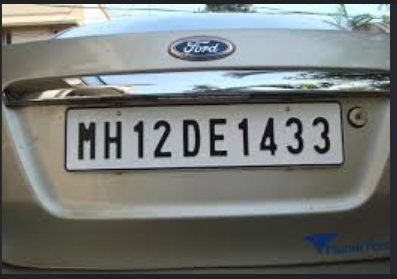

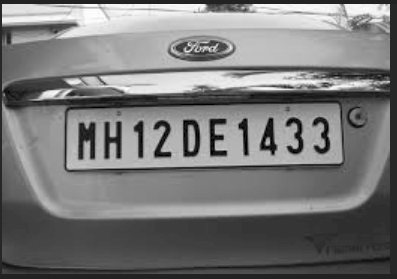

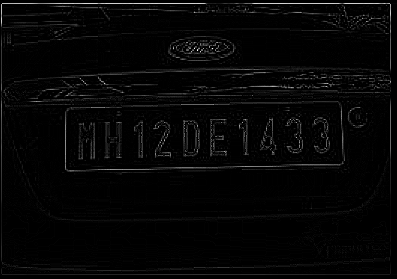

Laplacian



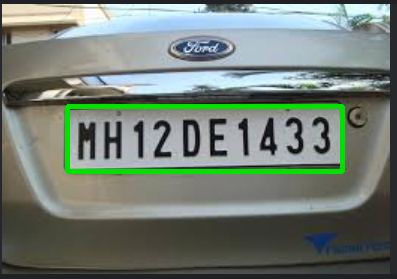

detected number plate: HHI2 DE143J
runtime: 7.07017707824707


In [ ]:
#importing libs
import cv2
print("cv2 imported")
import numpy as np
from google.colab.patches import cv2_imshow
import time

# Start time
start_time = time.time()




#image initailization
img=cv2.imread(IMG_PATH,1)
img_grayscale=cv2.imread(IMG_PATH,0)
inverted=cv2.bitwise_not(img)


#canny img edge detection

grad_sobel_x= cv2.Sobel(img_grayscale,-1,1,0)
grad_sobel_y= cv2.Sobel(img_grayscale,-1,0,1)

grad_sobel_xy= cv2.addWeighted(grad_sobel_x,0.5,grad_sobel_y,0.5,0)
grad_LL= cv2.Laplacian(img_grayscale,-1)
blur=cv2.GaussianBlur(img_grayscale,(5,5),0)
canny= cv2.Canny(blur,100,250)
cv2_imshow(img)


cv2_imshow(img_grayscale)
#cv2_imshow(grad_sobel_x)
#print("sobel filter along X-axis ")
#cv2_imshow(grad_sobel_y)
#print("sobel filter along Y-axis ")


#cv2_imshow(grad_sobel_xy)
#print("sobel filter along X&Y-axis ")

cv2_imshow(grad_LL)
print("Laplacian")


import cv2
from matplotlib import pyplot as plt
import numpy as np



reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(grad_LL)
#print(result)
if len(result)==0:
  print("no plate detected")
else:
  text=result[0][1]
  print("")
  img=cv2.imread(IMG_PATH,1)
  top_left= tuple(result[0][0][0])
  bottom_right= tuple(result[0][0][2])
  img = cv2.rectangle(img,top_left,bottom_right,(0,225,0),3)
  cv2_imshow(img)
  print("detected number plate:",text)

# End time
end_time = time.time()

# Calculate total runtime
total_runtime = end_time - start_time

print("runtime:",total_runtime)





##**kirsch**

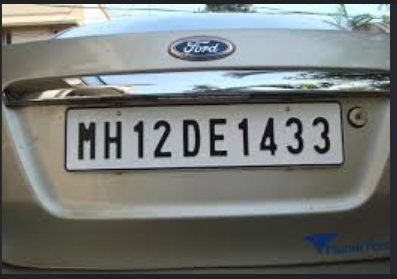

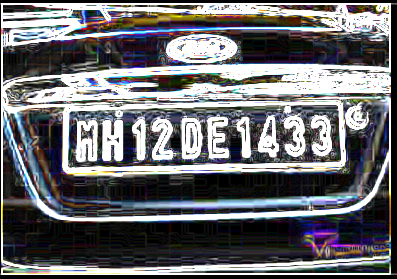

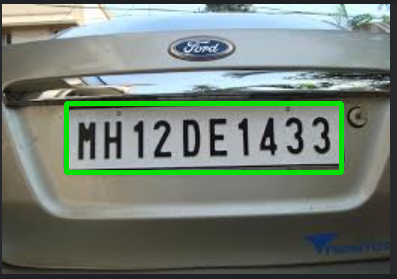

detected number plate: @HIZDE1432
runtime: 5.235306262969971


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Start time
start_time = time.time()

def apply_kirsch(image):
    # Define Kirsch kernels for 8 directions
    kernels = [
        np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),  # Direction 0
        np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),  # Direction 1
        np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),  # Direction 2
        np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]]),  # Direction 3
        np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),  # Direction 4
        np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),  # Direction 5
        np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),  # Direction 6
        np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])   # Direction 7
    ]

    # Apply each Kirsch kernel and find the maximum response
    results = [cv2.filter2D(image, -1, kernel) for kernel in kernels]
    kirsch_output = np.max(results, axis=0)  # Combine results by taking element-wise maximum

    return kirsch_output


img=cv2.imread(IMG_PATH,1)

    # Apply Kirsch edge detection
kirsch_result = apply_kirsch(img)

    # Display the original image and Kirsch edge detection result
cv2_imshow(img)  # Display original grayscale image
cv2_imshow(kirsch_result)  # Display Kirsch edge detection result
reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(kirsch_result)

if len(result)==0:
  print("no plate detected")
else:
  #print(result)

  text=result[0][1]
  print("")
  img=cv2.imread(IMG_PATH,1)
  top_left= tuple(result[0][0][0])
  bottom_right= tuple(result[0][0][2])
  img = cv2.rectangle(img,top_left,bottom_right,(0,225,0),3)
  cv2_imshow(img)
  print("detected number plate:",text)

# End time
end_time = time.time()

# Calculate total runtime
total_runtime = end_time - start_time

print("runtime:",total_runtime)


##sobel filter

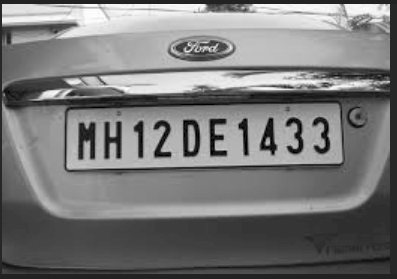

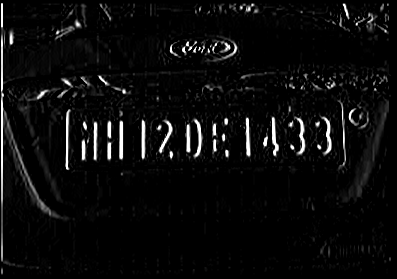

sobel filter along X-axis 


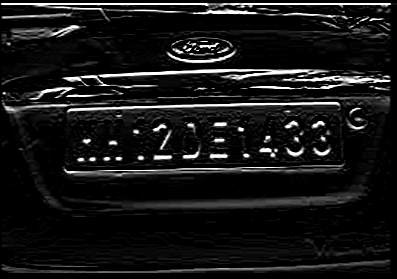

sobel filter along Y-axis 


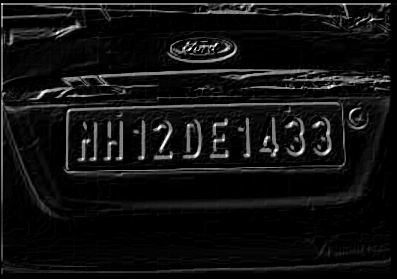

sobel filter along X&Y-axis 


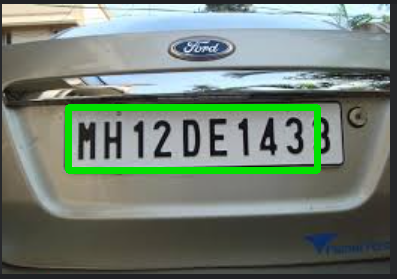

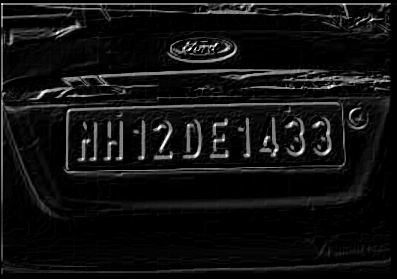

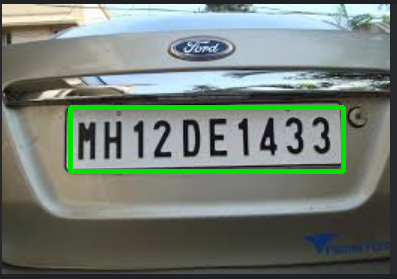

detected number plate: HIH12 DE 1433
runtime: 4.6335062980651855


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Start time
start_time = time.time()

grad_sobel_x= cv2.Sobel(img_grayscale,-1,1,0)
grad_sobel_y= cv2.Sobel(img_grayscale,-1,0,1)

grad_sobel_xy= cv2.addWeighted(grad_sobel_x,0.5,grad_sobel_y,0.5,0)


cv2_imshow(img_grayscale)
cv2_imshow(grad_sobel_x)
print("sobel filter along X-axis ")
cv2_imshow(grad_sobel_y)
print("sobel filter along Y-axis ")


cv2_imshow(grad_sobel_xy)
print("sobel filter along X&Y-axis ")

cv2_imshow(img)
cv2_imshow(grad_sobel_xy)
reader= easyocr.Reader(['en'], gpu=False)
result= reader.readtext(grad_sobel_xy)

if len(result)==0:
  print("no plate detected")
else:
  #print(result)

  text=result[0][1]
  print("")
  img=cv2.imread(IMG_PATH,1)
  top_left= tuple(result[0][0][0])
  bottom_right= tuple(result[0][0][2])
  img = cv2.rectangle(img,top_left,bottom_right,(0,225,0),3)
  cv2_imshow(img)
  print("detected number plate:",text)

# End time
end_time = time.time()

# Calculate total runtime
total_runtime = end_time - start_time

print("runtime:",total_runtime)

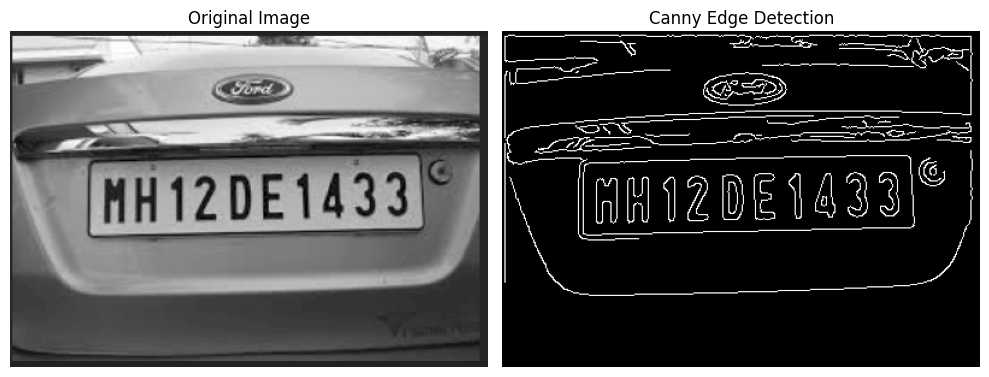

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Copy of MH12DE1433.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blurred, low_threshold, high_threshold)

# Plotting the original image and the edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


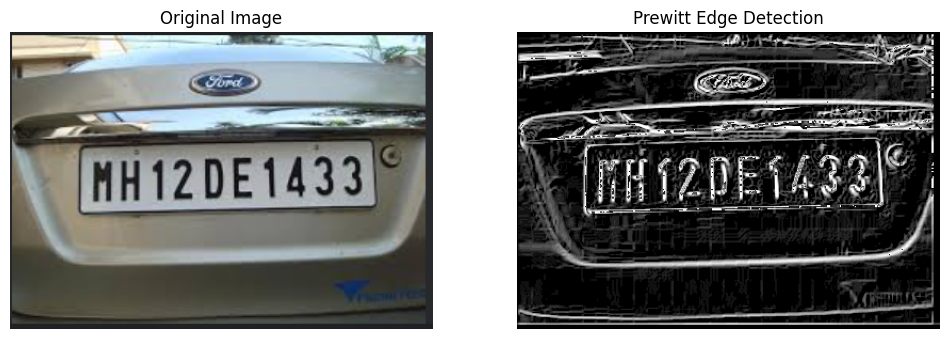

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/Copy of MH12DE1433.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define Prewitt operator kernels
prewitt_kernel_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])

prewitt_kernel_y = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])

# Apply the Prewitt operator
edges_x = cv2.filter2D(gray_image, -1, prewitt_kernel_x)
edges_y = cv2.filter2D(gray_image, -1, prewitt_kernel_y)

# Combine the results
edges = np.sqrt(edges_x + edges_y)
edges = np.uint8(edges)

# Plot the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Prewitt Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


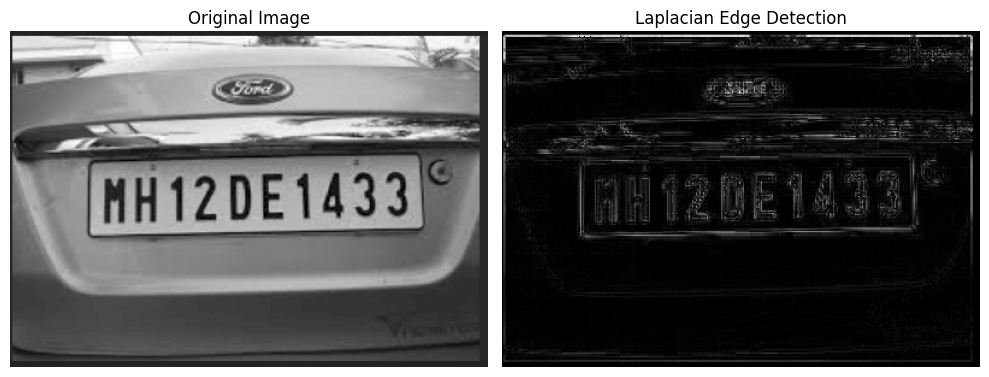

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Copy of MH12DE1433.png', cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert the result to 8-bit unsigned integer
abs_laplacian = np.uint8(np.absolute(laplacian))

# Plot the original image and the edge detection result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.imshow(abs_laplacian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


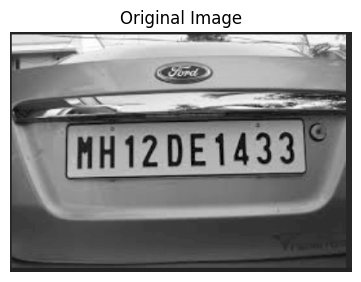

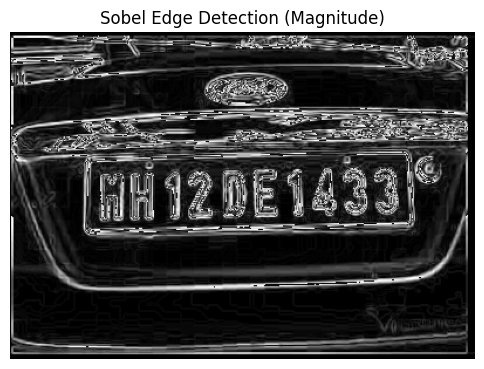

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Copy of MH12DE1433.png', cv2.IMREAD_GRAYSCALE)

# Apply the Sobel edge detection in the x direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Apply the Sobel edge detection in the y direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradient
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert the result to 8-bit unsigned integer
abs_sobel = np.uint8(np.absolute(sobel_magnitude))

# Plot the original image and the edge detection result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')


# Plot the magnitude of the gradient
plt.figure(figsize=(6, 6))
plt.title('Sobel Edge Detection (Magnitude)')
plt.imshow(np.uint8(np.absolute(abs_sobel)), cmap='gray')
plt.axis('off')
plt.show()
